In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv("C:/Users/okone/Desktop/Elya/heart.csv", sep=",")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data.shape

(303, 14)

In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

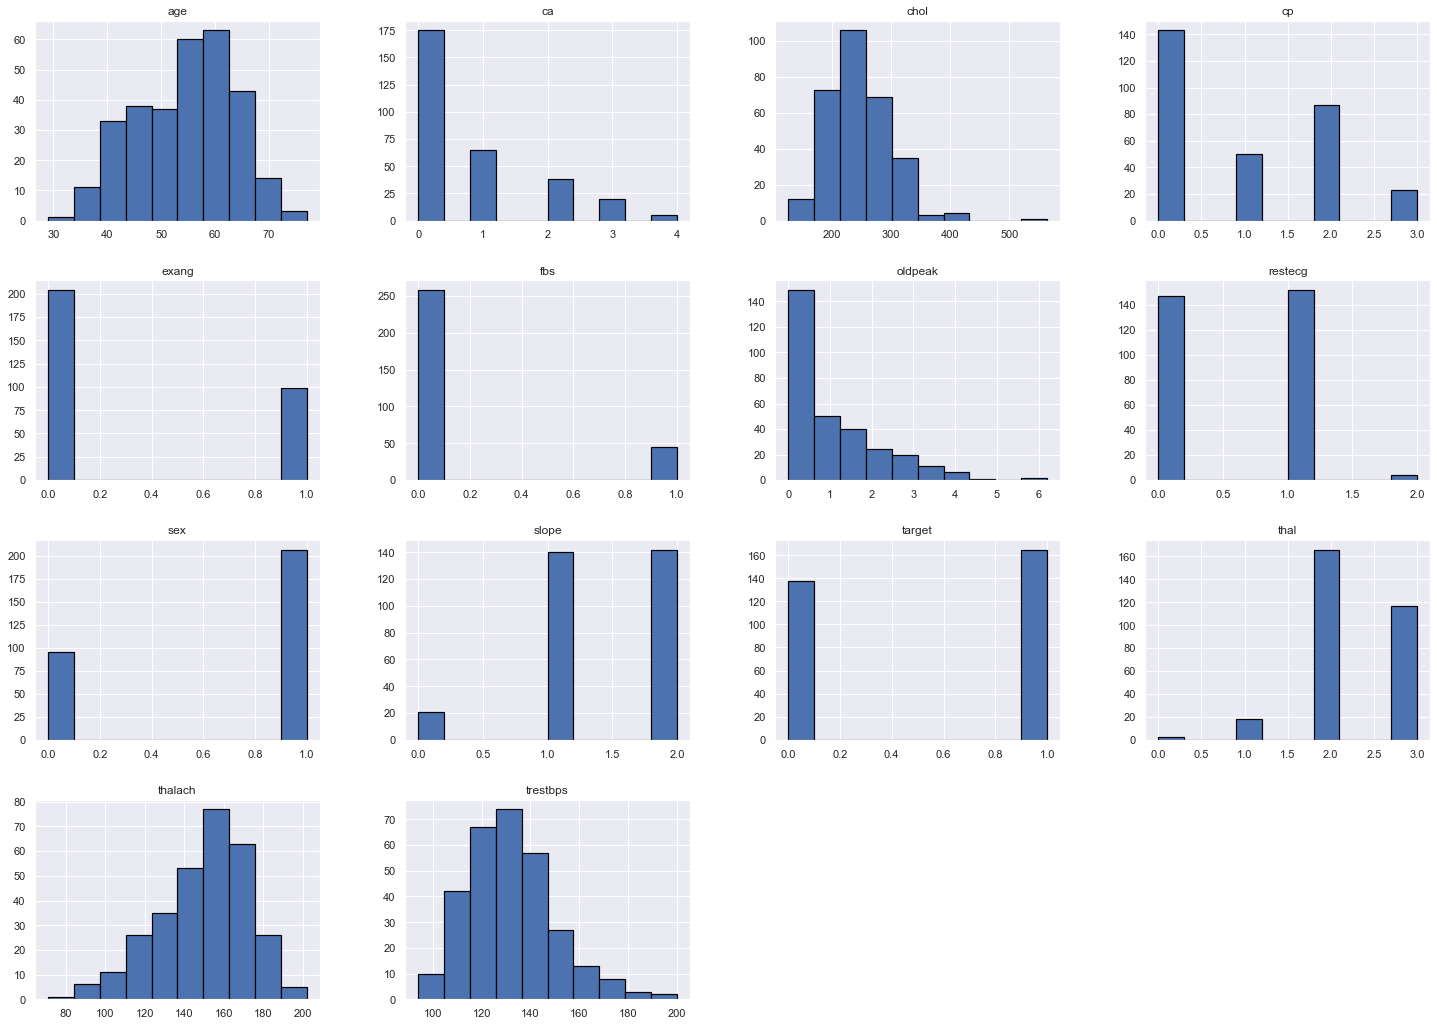

In [ ]:
import matplotlib.pyplot as plt
data.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(25,18)
plt.show

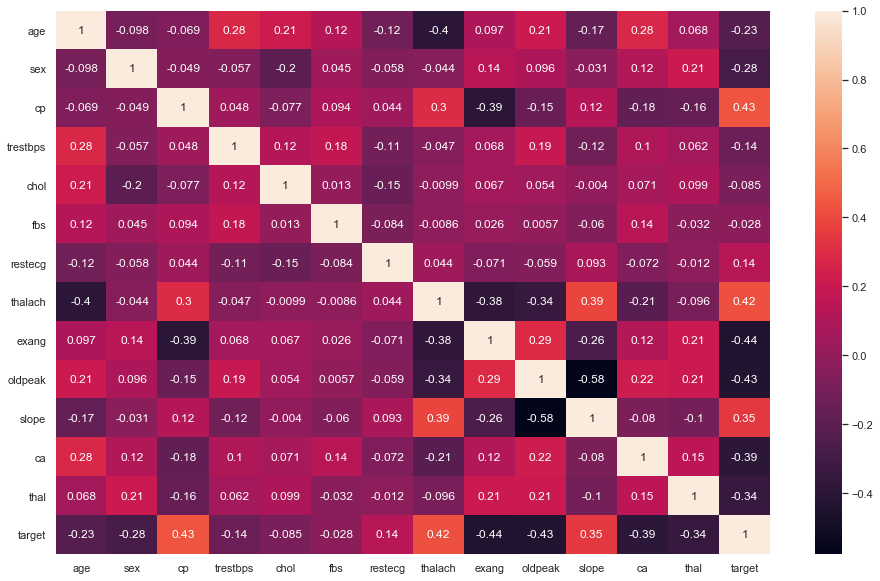

In [ ]:
import seaborn as sns
sns.set()
plt.figure(figsize = (16,10))
sns.heatmap(data.loc[:, ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].corr(),
    annot=True)

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#разделение данных на независимые переменные и целевую
X = data.drop(['target'], axis = 1)
y = data['target']

In [ ]:
# Разобъем выборку на обучающую и проверочные(валидационная и тестовая) выборки
x_train, x_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#сброс индексов 
x_train = x_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
x_val_test = x_val_test.reset_index(drop = True)
y_val_test = y_val_test.reset_index(drop = True)

In [ ]:
#разделение проверочных данных на валидационные и тестовые
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size = 0.5, random_state = 42)


In [ ]:
x_val = x_val.reset_index(drop = True)
x_test = x_test.reset_index(drop = True)
y_val = y_val.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)
x_val_sc = sc.transform(x_val)

In [ ]:
x_train_sc = pd.DataFrame(x_train_sc, columns = x_train.columns)
x_test_sc= pd.DataFrame(x_test_sc, columns = x_test.columns)
x_val_sc = pd.DataFrame(x_val_sc, columns = x_val.columns)

In [ ]:
x_train_sc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.210499,0.606417,-0.912608,-1.119298,0.845164,-0.398083,-0.974965,0.190079,-0.755229,-0.924445,1.06615,0.278447,-0.528042
1,-1.322270,0.606417,-0.912608,-0.668709,-1.346516,-0.398083,-0.974965,-1.238270,1.324102,1.237760,-0.59579,-0.705399,1.094349
2,0.130751,0.606417,-0.912608,-0.105474,0.709396,2.512040,-0.974965,-1.974087,1.324102,0.459367,-2.25773,-0.705399,1.094349
3,-0.651645,-1.649029,0.035789,0.119820,0.476651,-0.398083,0.921297,0.579629,-0.755229,-0.924445,-0.59579,-0.705399,-0.528042
4,0.242522,0.606417,-0.912608,-1.231945,1.717957,-0.398083,0.921297,-0.242754,1.324102,1.670201,-0.59579,0.278447,1.094349


In [ ]:
object_list_feature = list(x_train_sc[['sex', 'cp','fbs','restecg','exang','slope','ca','thal']].columns)

In [ ]:
from category_encoders import OneHotEncoder
ce_one_hot = OneHotEncoder(cols = object_list_feature)
x_train_k = ce_one_hot.fit_transform(x_train_sc)

In [ ]:
x_val_k = ce_one_hot.transform(x_val_sc)
x_test_k = ce_one_hot.transform(x_test_sc)

In [ ]:
feat_labels = x_train_k.columns[0:]
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=1)
#forest = RandomForestClassifier()
forest.fit(x_train_k, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train_k.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))
# Show features importances

 1) thalach                        0.100483
 2) cp_1                           0.098802
 3) age                            0.090282
 4) oldpeak                        0.084276
 5) ca_2                           0.083773
 6) chol                           0.071766
 7) trestbps                       0.059260
 8) thal_2                         0.049544
 9) thal_1                         0.047343
10) exang_2                        0.041677
11) exang_1                        0.033652
12) slope_2                        0.029086
13) slope_1                        0.028052
14) sex_1                          0.019711
15) cp_3                           0.018907
16) ca_3                           0.017803
17) sex_2                          0.016910
18) ca_1                           0.015516
19) restecg_1                      0.015425
20) restecg_2                      0.014460
21) cp_4                           0.013027
22) cp_2                           0.012868
23) ca_4                        

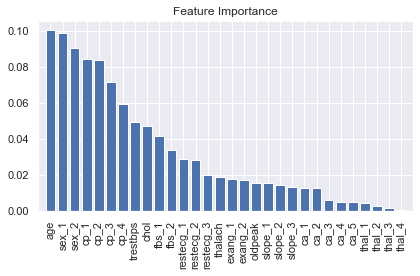

In [ ]:
plt.title('Feature Importance')
plt.bar(range(x_train_k.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train_k.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, x_train_k.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
x_train_k.drop(["ca_5","thal_4","restecg_3"], inplace=True, axis=1)

KeyError: "['ca_5' 'thal_4' 'restecg_3'] not found in axis"

In [ ]:

x_test_k.drop(["ca_5","thal_4","restecg_3"], inplace=True, axis=1) 
x_val_k.drop(["ca_5","thal_4","restecg_3"], inplace=True, axis=1) 


In [ ]:

def train_validate_score(model):
    kfold = StratifiedKFold(n_splits=10,
                           random_state=1).split(x_train_k, y_train)
    for k, (train, test) in enumerate(kfold):
        model.fit(x_train_k[train], y_train.iloc[train])
        print('Fold: %s, Class dist.: %s' % (k+1,
                                            np.bincount(y_train.iloc[train])))
    y_pred=model.predict(X_test)
    print('\nAccuracy: %.2f' % accuracy_score(y_test, y_pred))
    print('\nRecall: %s' % recall_score(y_test, y_pred, average=None))
    print('\nPrecision: %s' % precision_score(y_test, y_pred, average=None))
    


In [ ]:
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
#анализ модели без настройки гиперпараметров
for classifier, pl in zip((LogisticRegression, RandomForestClassifier, DecisionTreeClassifier),
                          ('Logistic regression', 'Random forest', 'Decision Tree')):

    pipe = Pipeline([('clf', classifier(random_state=3))])
    pipe.fit(x_train_k, y_train)
    
    print(pl)
    print(pipe.score(x_test_k, y_test))
    print()

Logistic regression
0.9130434782608695

Random forest
0.8260869565217391

Decision Tree
0.717391304347826



In [ ]:
#с настройками гиперпараметров для дерева решений
dt = DecisionTreeClassifier(random_state=17)
tree_params = {'criterion': ['gini','entropy'],
              'max_depth' : range(1,20),
              'min_samples_split': range(2,20,5),
              'min_samples_leaf':range(1,20,5)}
first_tree_search = RandomizedSearchCV(dt, tree_params)

In [ ]:
first_tree_search.fit(x_train_k, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=17,
                                                    splitter='bes

In [ ]:
first_tree = first_tree_search.best_estimator_
first_tree_search.best_params_, first_tree_search.best_score_

({'min_samples_split': 7,
  'min_samples_leaf': 1,
  'max_depth': 16,
  'criterion': 'entropy'},
 0.8018867924528302)

In [ ]:
first_tree.fit(x_train_k, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=16,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [ ]:
y_pred = first_tree.predict(x_test_k)

In [ ]:
#предсказания и метрики качества на тестовой выборке
from sklearn.metrics import classification_report

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))
print('best score: - ', first_tree_search.best_score_)

              precision    recall  f1-score   support

     class 0       0.55      0.69      0.61        16
     class 1       0.81      0.70      0.75        30

    accuracy                           0.70        46
   macro avg       0.68      0.69      0.68        46
weighted avg       0.72      0.70      0.70        46

best score: -  0.8018867924528302


In [ ]:
y_pred = first_tree.predict(x_val_k)

In [ ]:
#предсказания и метрики качества на валидационной выборке
target_names = ['class 0', 'class 1']
print(classification_report(y_val, y_pred, target_names=target_names))
print('best score: - ', first_tree_search.best_score_)

              precision    recall  f1-score   support

     class 0       0.79      0.79      0.79        19
     class 1       0.85      0.85      0.85        26

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.82      0.82      0.82        45

best score: -  0.8018867924528302


In [ ]:
#настройка гиперпараметров для RandomForestClassifier
clf_rf = RandomForestClassifier()

In [ ]:
rf_params = {'criterion': ['gini','entropy'],
             'n_estimators': [125,150,175],
              'max_depth' : range(1,20),
              'min_samples_split': range(2,20,5),
              'min_samples_leaf':range(1,20,5)}

In [ ]:
#grid_search_rf = GridSearchCV(clf_rf,rf_params, cv = 5)
#так как очень долго грузилось, решила им не пользоваться :)
grid_search_rf = RandomizedSearchCV(clf_rf,rf_params, cv = 5)

In [ ]:
grid_search_rf.fit(x_train_k, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [ ]:
grid_search = grid_search_rf.best_estimator_
grid_search_rf.best_params_, grid_search_rf.best_score_

({'n_estimators': 175,
  'min_samples_split': 7,
  'min_samples_leaf': 1,
  'max_depth': 13,
  'criterion': 'entropy'},
 0.839622641509434)

In [ ]:
grid_search.fit(x_train_k, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=175,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = grid_search.predict(x_test_k)

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))
print('best score: - ', grid_search_rf.best_score_)

              precision    recall  f1-score   support

     class 0       0.72      0.81      0.76        16
     class 1       0.89      0.83      0.86        30

    accuracy                           0.83        46
   macro avg       0.81      0.82      0.81        46
weighted avg       0.83      0.83      0.83        46

best score: -  0.839622641509434


In [ ]:
y_pred = grid_search.predict(x_val_k)

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_val, y_pred, target_names=target_names))
print('best score: - ', grid_search_rf.best_score_)

              precision    recall  f1-score   support

     class 0       0.88      0.79      0.83        19
     class 1       0.86      0.92      0.89        26

    accuracy                           0.87        45
   macro avg       0.87      0.86      0.86        45
weighted avg       0.87      0.87      0.87        45

best score: -  0.839622641509434


In [ ]:
#настройка гиперпараметров для логистической регресии
# Будем использовать функцию GridSearchCV для поиска оптимальных гиперпараметров
# C - – обратный коэффициент регуляризации
logit = LogisticRegression()
logit_params = {'C': np.logspace(-4, 2, 50)}
logit_grid = GridSearchCV(logit, logit_params, cv=3)

In [ ]:
logit_grid.fit(x_train_k, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       8.28642773e-01, 1.09854114e+00, 1.45634848e+00, 1.93069773e+00,
       2.55954792e+00, 3.39322177e+00, 4.49843267e+00, 5.96362332e+00,
       7.90604321e+00, 1.04811313e+01, 1.38949549e+01, 1.84206997e+01,
       2.44205309e+01, 3.23745754e+01, 4.29193426e+01, 5.68986603e+01,
       7.

In [ ]:
logit_grid.best_params_, logit_grid.best_score_

({'C': 0.1151395399326447}, 0.8632075471698113)

In [ ]:
logit = LogisticRegression(C=1.4)
logit.fit(x_train_k, y_train)

LogisticRegression(C=1.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_test = logit_grid.predict(x_test_k)

In [ ]:
#предсказания и метрики качества на тренировочной выборке
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_test, target_names=target_names))
print('score_ - ', logit_grid.best_score_)

              precision    recall  f1-score   support

     class 0       0.82      0.88      0.85        16
     class 1       0.93      0.90      0.92        30

    accuracy                           0.89        46
   macro avg       0.88      0.89      0.88        46
weighted avg       0.89      0.89      0.89        46

score_ -  0.8632075471698113


In [ ]:
y_pred_val = logit_grid.predict(x_val_k)

In [ ]:
#предсказания и метрики качества на валиадционной выборке
target_names = ['class 0', 'class 1']
print(classification_report(y_val, y_pred_val, target_names=target_names))
print('score_ - ', logit_grid.best_score_)

              precision    recall  f1-score   support

     class 0       0.93      0.74      0.82        19
     class 1       0.83      0.96      0.89        26

    accuracy                           0.87        45
   macro avg       0.88      0.85      0.86        45
weighted avg       0.88      0.87      0.86        45

score_ -  0.8632075471698113


In [ ]:
param_grid_rf = [
    {'rf_model__criterion': ['entropy','gini'],
    'rf_model__n_estimators': [125,150,175],
    'rf_model__max_depth': [None,2, 4],
    'rf_model__min_samples_split': [0.001, 0.01],
    'rf_model__min_samples_leaf': [0.001, 0.009]}
]

# grid search
pipe_rf = Pipeline([('rf_model', RandomForestClassifier(random_state=3))])
gs_rf = GridSearchCV(estimator=pipe_rf,
                    param_grid=param_grid_rf,
                    scoring='accuracy',
                    cv=4, n_jobs=-1, verbose=1)

# fitting grid search
gs_rf.fit(x_train, y_train)

# best parameters
print('best accuracy: {:.4}%'.format(gs_rf.best_score_ * 100))
print('params:\n', gs_rf.best_params_)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  1.7min finished


best accuracy: 82.08%
params:
 {'rf_model__criterion': 'entropy', 'rf_model__max_depth': None, 'rf_model__min_samples_leaf': 0.009, 'rf_model__min_samples_split': 0.001, 'rf_model__n_estimators': 150}
